<a href="https://colab.research.google.com/github/MingxiaWu/jupyterlab/blob/main/GenAI_Homework_5b_Michelle_Wu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

California Science and Technology University \
GenAI: Introduction to LLM MB/CSE642, Spring 2024 \
Lecturer : M. Sridharan \
Student: Michelle Wu \
Homework 5b \
1/22/24

Epoch 1/15
750/750 [==============================] - 47s 61ms/step - loss: 0.2123 - accuracy: 0.9351 - val_loss: 0.0659 - val_accuracy: 0.9796
Epoch 2/15
750/750 [==============================] - 48s 64ms/step - loss: 0.0550 - accuracy: 0.9826 - val_loss: 0.0577 - val_accuracy: 0.9821
Epoch 3/15
750/750 [==============================] - 45s 60ms/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0407 - val_accuracy: 0.9877
Epoch 4/15
750/750 [==============================] - 46s 61ms/step - loss: 0.0276 - accuracy: 0.9914 - val_loss: 0.0414 - val_accuracy: 0.9869
Epoch 5/15
750/750 [==============================] - 46s 61ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0338 - val_accuracy: 0.9903
Epoch 6/15
750/750 [==============================] - 47s 63ms/step - loss: 0.0178 - accuracy: 0.9945 - val_loss: 0.0364 - val_accuracy: 0.9892
Epoch 7/15
750/750 [==============================] - 48s 64ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.0569 - val_accuracy:

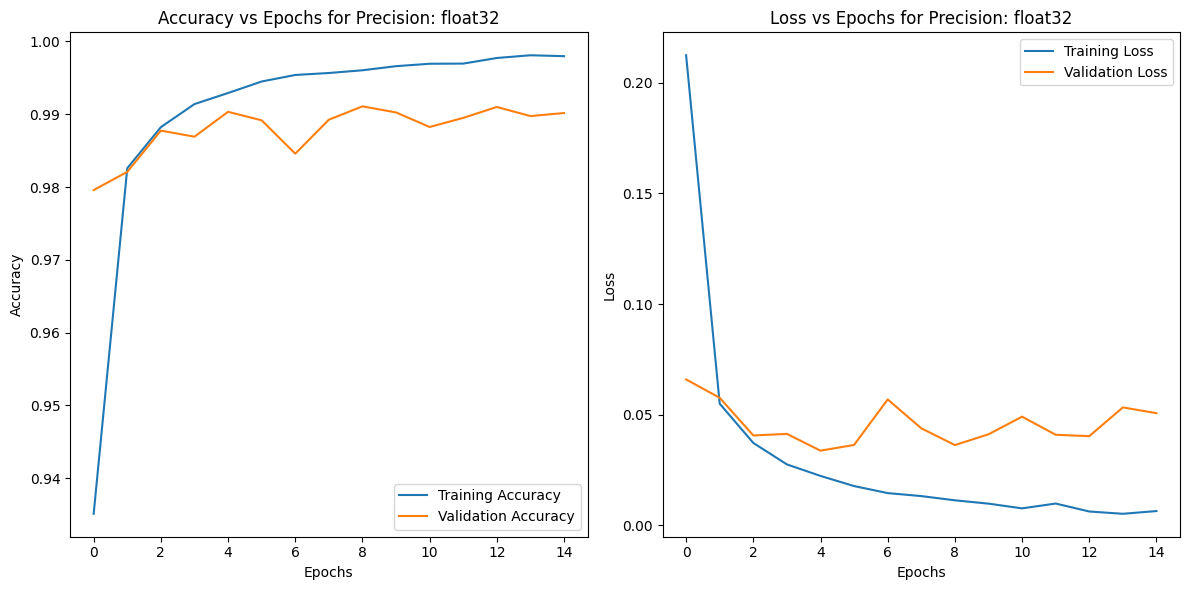

Epoch 1/15
750/750 [==============================] - 48s 63ms/step - loss: 0.2056 - accuracy: 0.9383 - val_loss: 0.0741 - val_accuracy: 0.9772
Epoch 2/15
750/750 [==============================] - 46s 61ms/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0439 - val_accuracy: 0.9867
Epoch 3/15
750/750 [==============================] - 43s 58ms/step - loss: 0.0365 - accuracy: 0.9883 - val_loss: 0.0536 - val_accuracy: 0.9841
Epoch 4/15
750/750 [==============================] - 46s 62ms/step - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.0409 - val_accuracy: 0.9880
Epoch 5/15
750/750 [==============================] - 46s 61ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0446 - val_accuracy: 0.9882
Epoch 6/15
750/750 [==============================] - 43s 58ms/step - loss: 0.0183 - accuracy: 0.9939 - val_loss: 0.0386 - val_accuracy: 0.9896
Epoch 7/15
750/750 [==============================] - 44s 58ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.0414 - val_accuracy:

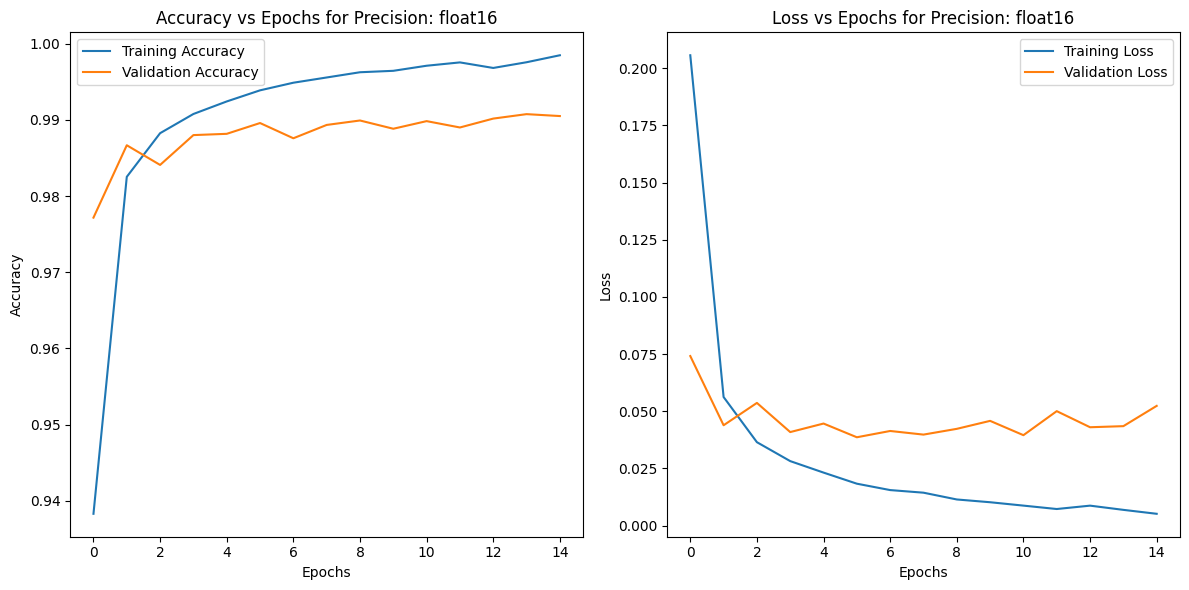

Epoch 1/15
750/750 [==============================] - 50s 64ms/step - loss: 1.7537 - accuracy: 0.3693 - val_loss: 1.6377 - val_accuracy: 0.4098
Epoch 2/15
750/750 [==============================] - 45s 61ms/step - loss: 1.6302 - accuracy: 0.4134 - val_loss: 1.6119 - val_accuracy: 0.4149
Epoch 3/15
750/750 [==============================] - 47s 62ms/step - loss: 1.5991 - accuracy: 0.4209 - val_loss: 1.6134 - val_accuracy: 0.4167
Epoch 4/15
750/750 [==============================] - 44s 58ms/step - loss: 1.5761 - accuracy: 0.4278 - val_loss: 1.6026 - val_accuracy: 0.4176
Epoch 5/15
750/750 [==============================] - 44s 59ms/step - loss: 1.5610 - accuracy: 0.4338 - val_loss: 1.5834 - val_accuracy: 0.4249
Epoch 6/15
750/750 [==============================] - 46s 62ms/step - loss: 1.5476 - accuracy: 0.4391 - val_loss: 1.5795 - val_accuracy: 0.4297
Epoch 7/15
750/750 [==============================] - 46s 61ms/step - loss: 1.5361 - accuracy: 0.4419 - val_loss: 1.5773 - val_accuracy:

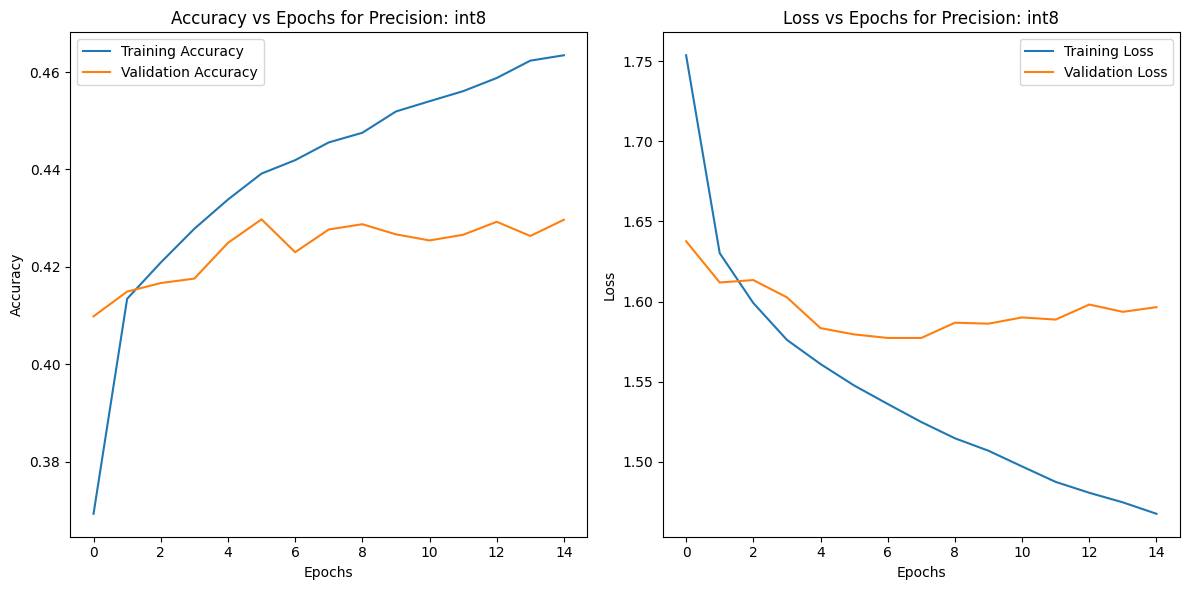

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (train_images.reshape((60000, 28, 28, 1)) / 255.0).astype(np.float32)
test_images = (test_images.reshape((10000, 28, 28, 1)) / 255.0).astype(np.float32)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define a function to train and evaluate the model for different precisions
def train_and_evaluate_model(precision='float32'):
    # Build a simple convolutional neural network
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Convert data to the specified precision
    if precision == 'float16':
        train_images_precision = train_images.astype(np.float16)
        test_images_precision = test_images.astype(np.float16)
    elif precision == 'int8':
        train_images_precision = train_images.astype(np.int8)
        test_images_precision = test_images.astype(np.int8)
    else:
        # Default to float32
        train_images_precision = train_images
        test_images_precision = test_images

    # Train the model
    history = model.fit(train_images_precision, train_labels, epochs=15, batch_size=64, validation_split=0.2)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images_precision, test_labels)
    print(f'Test accuracy for precision {precision}: {test_acc * 100:.2f}%')
# Plot training and validation accuracy vs epochs
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy vs Epochs for Precision: {precision}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss vs epochs
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss vs Epochs for Precision: {precision}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Train and evaluate the model for different precisions
train_and_evaluate_model(precision='float32')
train_and_evaluate_model(precision='float16')
train_and_evaluate_model(precision='int8')  # Note: Using int8 for loss might not be meaningful
